# Análisis de datos FIFA - Ventaja del equipo local

 Es común la creencia de que un equipo tiene ventaja cuando juega en su territorio y que los ánimos bajan cuando juega en el territorio de su contrincante. Se investiga qué tan cierto es esto.

## Inicialización

In [1]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
# cargar los datos
fifa = pd.read_csv('https://raw.githubusercontent.com/IreneRA/Hackaton-Tripleten/Raw-data/international_matches.csv')

In [3]:
# vista previa
fifa.head(5)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#información general
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

Descripción de los datos de `fifa`:
-  `date`: fecha en que se llevó a cabo el partido.
-  `home_team`: equipo local o equipo que juega en casa.
-  `away_team`: equipo visitante.
-  `home_team_continent`: continente al que pertenece el equipo local.
-  `away_team_continent`: continente al que pertenece el equipo visitante.
-  `home_team_fifa_rank`: clasificación FIFA del equipo local en el momento del partido.
-  `away_team_fifa_rank`: clasificación FIFA del equipo visitante en el momento del partido.
-  `home_team_total_fifa_points`: puntos totales FIFA del equipo local en el momento del partido.
-  `away_team_total_fifa_points`: puntos totales FIFA del equipo visitante en el momento del partido.
-  `home_team_score`: goles anotados por el equipo local durante el partido.
-  `away_team_score`: goles anotados por el equipo visitante durante el partido.
-  `tournament`: torneo o competición en el que se lleva a cabo el partido.
-  `city`: ciudad en la que se realizó el partido.
-  `country`: país en el que se realizó el partido.
-  `neutral_location`: booleano (True/False) que indica si el partido se llevó a cabo en una ubicación neutral (es decir, no es el hogar de ninguno de los equipos).
-  `shoot_out`: indica si hubo una tanda de penaltis ("Sí" o "No").
-  `home_team_result`: resultado del equipo local (puede ser "Ganar", "Empatar" o "Perder").
-  `home_team_goalkeeper_score`: calificación del portero del equipo local.
-  `away_team_goalkeeper_score`: calificación del portero del equipo visitante.
-  `home_team_mean_defense_score`: calificación media de la defensa del equipo local.
-  `home_team_mean_offense_score`: calificación media del ataque del equipo local.
-  `home_team_mean_midfield_score`: calificación media del mediocampo del equipo local.
-  `away_team_mean_defense_score`: calificación media de la defensa del equipo visitante.
-  `away_team_mean_offense_score`: calificación media del ataque del equipo visitante.
-  `away_team_mean_midfield_score`: calificación media del mediocampo del equipo visitante.

In [5]:
# convertir la columna 'date' a datetime
fifa['date'] = pd.to_datetime(fifa['date'])

# creación nueva columna año
fifa['year'] = fifa['date'].dt.year

Verificar cambios realizados

In [6]:
# información general
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           23921 non-null  datetime64[ns]
 1   home_team                      23921 non-null  object        
 2   away_team                      23921 non-null  object        
 3   home_team_continent            23921 non-null  object        
 4   away_team_continent            23921 non-null  object        
 5   home_team_fifa_rank            23921 non-null  int64         
 6   away_team_fifa_rank            23921 non-null  int64         
 7   home_team_total_fifa_points    23921 non-null  int64         
 8   away_team_total_fifa_points    23921 non-null  int64         
 9   home_team_score                23921 non-null  int64         
 10  away_team_score                23921 non-null  int64         
 11  tournament     

## Evaluación de la ventaja del equipo local
 Se investiga la existencia y magnitud de la ventaja que puede tener un equipo al jugar en su propio país o continente, y cómo esta ventaja se manifiesta en diferentes torneos.

<ipython-input-7-cea25844e6a4>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  home_team['home_team_result'].value_counts().plot(kind='bar',ax=plt.subplot(1,3, 1),color=['limegreen','red','yellow'])


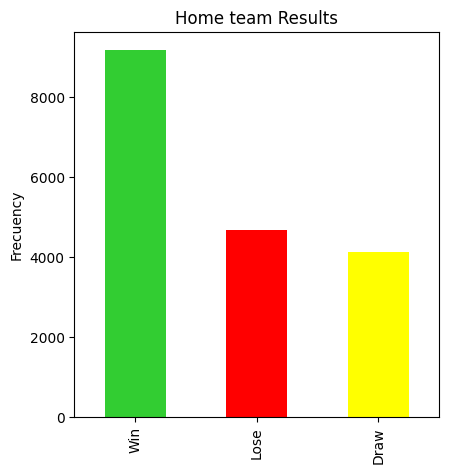

In [7]:
#partidos donde el equipo local juega en su país
home_team = fifa [fifa['neutral_location']==False]

#graficar los resultados
plt.subplots(figsize=(16, 5))
home_team['home_team_result'].value_counts().plot(kind='bar',ax=plt.subplot(1,3, 1),color=['limegreen','red','yellow'])
plt.title('Home team Results')
plt.ylabel('Frecuency')

plt.show()

Al ver los resultados globales cuando un equipo juega en su territorio, la columna verde muestra que el 51.05% de las veces el equipo gana, el 26.05% de los partidos pierde y el 22.90% termina en empate.

In [8]:
#Resultados
home_team['home_team_result'].value_counts()

Win     9162
Lose    4675
Draw    4110
Name: home_team_result, dtype: int64

In [10]:
#Porcentaje de resultados
home_team['home_team_result'].value_counts()/home_team.shape[0]*100

Win     51.050315
Lose    26.048922
Draw    22.900763
Name: home_team_result, dtype: float64

Estos resultados aparentan ventaja para el equipo sede.

In [9]:
#Convertir datos a formato json para pasarlos al sitio web
home_team['home_team_result'].value_counts().to_json(orient = 'columns')

'{"Win":9162,"Lose":4675,"Draw":4110}'

¿Este mismo comportamiento ocurrirá en distintos torneos?

**Análisis por torneo**

Se buscan los torneos de los que se tiene más información.

In [11]:
#partidos por toreno
fifa['tournament'].value_counts()

Friendly                                8558
FIFA World Cup qualification            5528
UEFA Euro qualification                 1723
African Cup of Nations qualification    1274
AFC Asian Cup qualification              541
                                        ... 
AFF Championship qualification             2
Copa América qualification                 2
Copa Confraternidad                        1
TIFOCO Tournament                          1
CONMEBOL–UEFA Cup of Champions             1
Name: tournament, Length: 82, dtype: int64

Sin tomar en cuenta los partidos amistosos, los torneos de los que se tiene más información son:
- FIFA World Cup qualification
- UEFA Euro qualification
- African Cup of Nations qualification

Se toman estos para continuar el análisis tomando en cuenta el torneo.

In [12]:
#datos separados por torneo, donde el equipo local juega en su país
fifa_wcq = home_team[home_team['tournament'] == 'FIFA World Cup qualification']
fifa_uefa = home_team[home_team['tournament'] == 'UEFA Euro qualification']
fifa_acnq = home_team[home_team['tournament'] == 'African Cup of Nations qualification']

In [13]:
#Convertir datos a formato json para pasarlos al sitio web
js_wcq = fifa_wcq['home_team_result'].value_counts().to_json(orient = 'columns')
print(js_wcq)

js_uefa = fifa_uefa['home_team_result'].value_counts().to_json(orient = 'columns')
print(js_uefa)

js_acnq = fifa_acnq['home_team_result'].value_counts().to_json(orient = 'columns')
print(js_acnq)

{"Win":2633,"Lose":1396,"Draw":1108}
{"Win":809,"Lose":587,"Draw":309}
{"Win":684,"Draw":291,"Lose":250}


<ipython-input-14-f6ba05d23acd>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  fifa_wcq['home_team_result'].value_counts().plot(kind='bar',ax=plt.subplot(1,3, 1),color=['limegreen','red','yellow'])


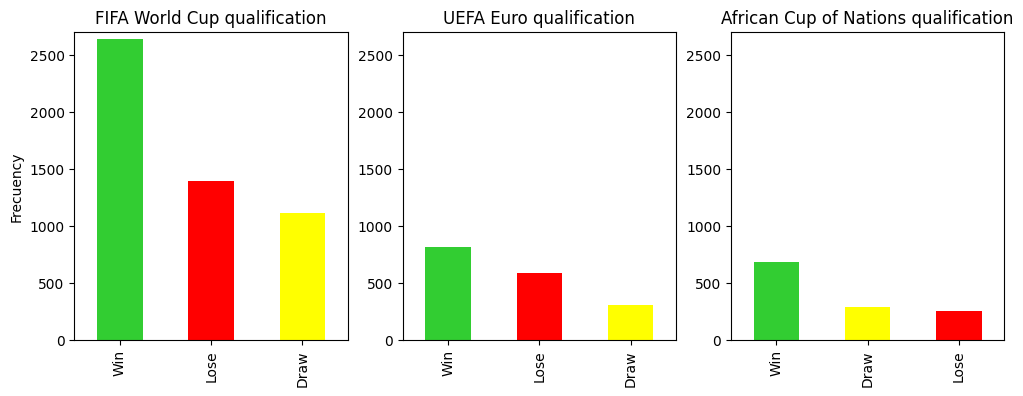

In [14]:
#graficar 3 torneos
plt.subplots(figsize=(12, 4))

fifa_wcq['home_team_result'].value_counts().plot(kind='bar',ax=plt.subplot(1,3, 1),color=['limegreen','red','yellow'])
plt.title('FIFA World Cup qualification')
plt.ylim(0,2700)
plt.ylabel('Frecuency')

fifa_uefa['home_team_result'].value_counts().plot(kind='bar',ax=plt.subplot(1,3, 2),color=['limegreen','red','yellow'])
plt.title('UEFA Euro qualification')
plt.ylim(0,2700)

fifa_acnq['home_team_result'].value_counts().plot(kind='bar',ax=plt.subplot(1,3, 3),color=['limegreen','yellow','red'])
plt.title('African Cup of Nations qualification')
plt.ylim(0,2700)

plt.show()

In [15]:
#Porcentaje de resultados del torneo FIFA World Cup qualification
fifa_wcq['home_team_result'].value_counts()/fifa_wcq.shape[0]*100

Win     51.255597
Lose    27.175394
Draw    21.569009
Name: home_team_result, dtype: float64

In [16]:
#Porcentaje de resultados del torneo UEFA Euro qualification
fifa_uefa['home_team_result'].value_counts()/fifa_uefa.shape[0]*100

Win     47.448680
Lose    34.428152
Draw    18.123167
Name: home_team_result, dtype: float64

In [17]:
#Porcentaje de resultados del torneo African Cup of Nations qualification
fifa_acnq['home_team_result'].value_counts()/fifa_acnq.shape[0]*100

Win     55.836735
Draw    23.755102
Lose    20.408163
Name: home_team_result, dtype: float64

Al graficar los resultados, se observa que en los 3 torneos aproximadamente el 50% de las veces el equipo jugando en su territorio gana. La única diferencia en el comportamiento es que en el Campeonato Africano de Naciones hay un mayor porcentaje de empates que de partidos perdidos.

## Conclusión
Al analizar la posible ventaja que puede tener un equipo al jugar en su propio país en distintos torneos, se obtuvieron porcentajes similares donde la mitad o incluso más de los partidos, el equipo sede gana.